# EDA- RETAIL SALES DATASET

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load & Read CSV & Show 1st 5 rows

In [2]:
df=pd.read_csv("retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


#### Data Understating- shape, columns, info, data types, duplicates, missing values, basic statistics

In [3]:
df.shape

(1000, 9)

In [4]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [7]:
len(df[df.duplicated])

0

In [8]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [9]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


### Data Cleaning 
- Coverting Date column to datetime

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [12]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day

In [13]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Year,Day
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,2023,24
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,2023,27
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,2023,13
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,2023,21
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,2023,6


In [14]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 45, 60, 100],
                        labels=['<18','18-25','26-35','36-45','46-60','61+'])

In [15]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Year,Day,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,2023,24,26-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,2023,27,26-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,2023,13,46-60
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,2023,21,36-45
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,2023,6,26-35


In [16]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Month', 'Year', 'Day', 'Age Group'],
      dtype='object')

## EDA- Customer & Product Analysis

#### Total Sales by Product Category

In [17]:
category_sales = df.groupby('Product Category')['Total Amount'].sum()

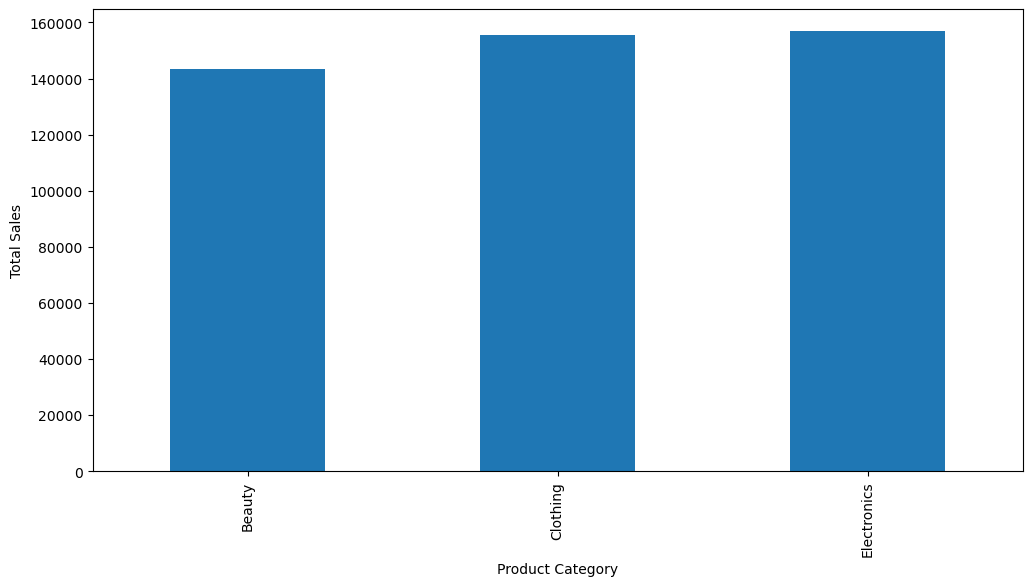

In [18]:
plt.figure(figsize=(12,6))
category_sales.plot(kind='bar')
plt.ylabel('Total Sales')
plt.show()

- Electronics products are bought the most and bring in the highest sales. Clothing and Beauty products also sell well, so customers are interested in all categories.

#### Sales by Gender

In [19]:
gender_sales = df.groupby('Gender')['Total Amount'].sum()

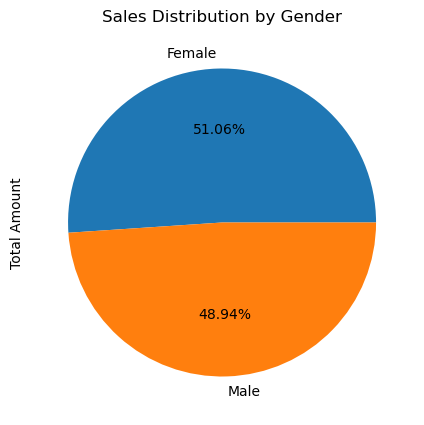

In [20]:
plt.figure(figsize=(8,5))
gender_sales.plot(kind='pie', autopct= '%1.2f%%')
plt.title('Sales Distribution by Gender')
plt.show()

- Female and Male customers spend almost the same amount.
- Females spend slightly more(51.06%), but the difference is very small.

#### Age Distribution of Customers 

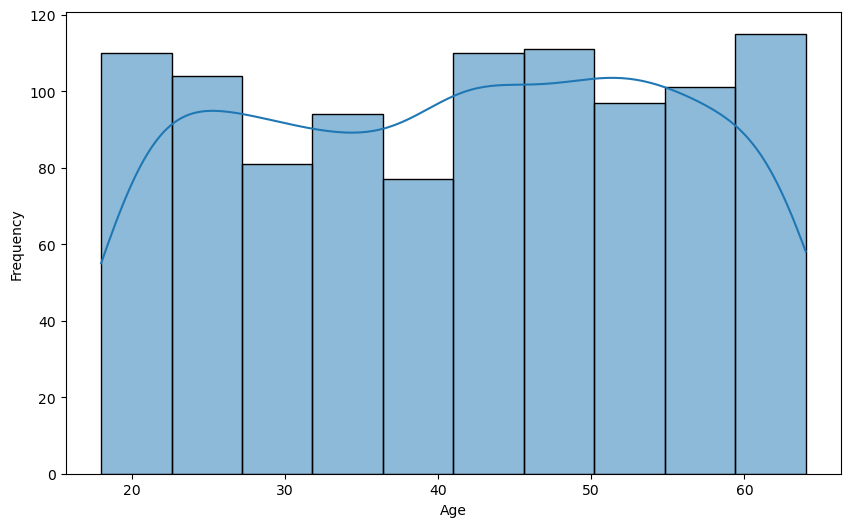

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins= 10, kde= True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- Most customers are between 25 and 50 years old, which means working-age people are the main buyers.

## Time Series Analysis

#### Monthly Sales Trend 

In [22]:
monthly_sales = df.groupby(['Year','Month'], as_index= False)['Total Amount'].sum()

<Figure size 1500x800 with 0 Axes>

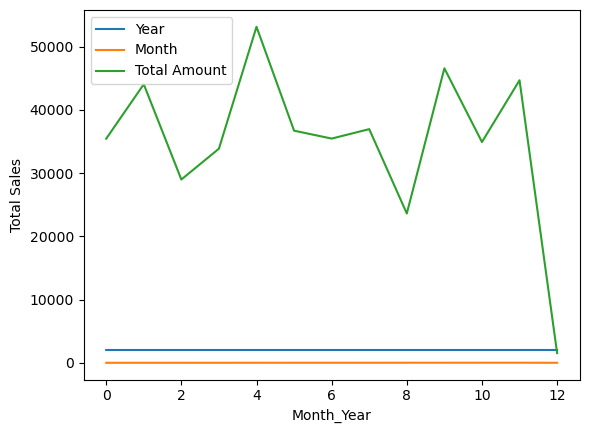

In [23]:
plt.figure(figsize=(15,8))
monthly_sales.plot(kind='line')
plt.xlabel('Month_Year')
plt.ylabel('Total Sales')
plt.show()

- Sales do not remain the same every month. Some months have higher sales, showing that offers, festivals, or seasons affect customer buying behavior.

### Quantity vs Total Amount by Product Category

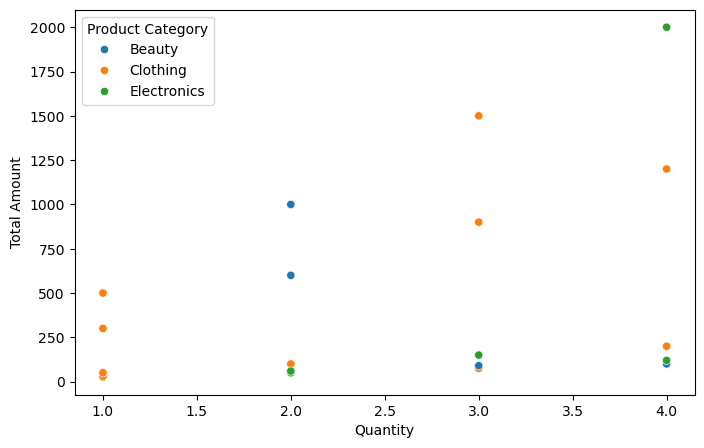

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Quantity', y='Total Amount', hue= 'Product Category')
plt.show()

- When customers buy more quantity, the total bill amount usually increases.

### Heatmap

In [25]:
df.corr(numeric_only=True)

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Month,Year,Day
Transaction ID,1.000000,0.065191,-0.026623,-0.060837,-0.075034,0.047538,-0.010855,-0.005052
Age,0.065191,1.000000,-0.023737,-0.038423,-0.060568,-0.000640,0.023269,0.041899
Quantity,-0.026623,-0.023737,1.000000,0.017501,0.373707,-0.021803,-0.020324,0.029650
Price per Unit,-0.060837,-0.038423,0.017501,1.000000,0.851925,-0.008161,0.020097,0.018303
Total Amount,-0.075034,-0.060568,0.373707,0.851925,1.000000,-0.005197,0.024714,0.036889
Month,0.047538,-0.000640,-0.021803,-0.008161,-0.005197,1.000000,-0.071981,-0.013895
Year,-0.010855,0.023269,-0.020324,0.020097,0.024714,-0.071981,1.000000,-0.072244
Day,-0.005052,0.041899,0.029650,0.018303,0.036889,-0.013895,-0.072244,1.000000


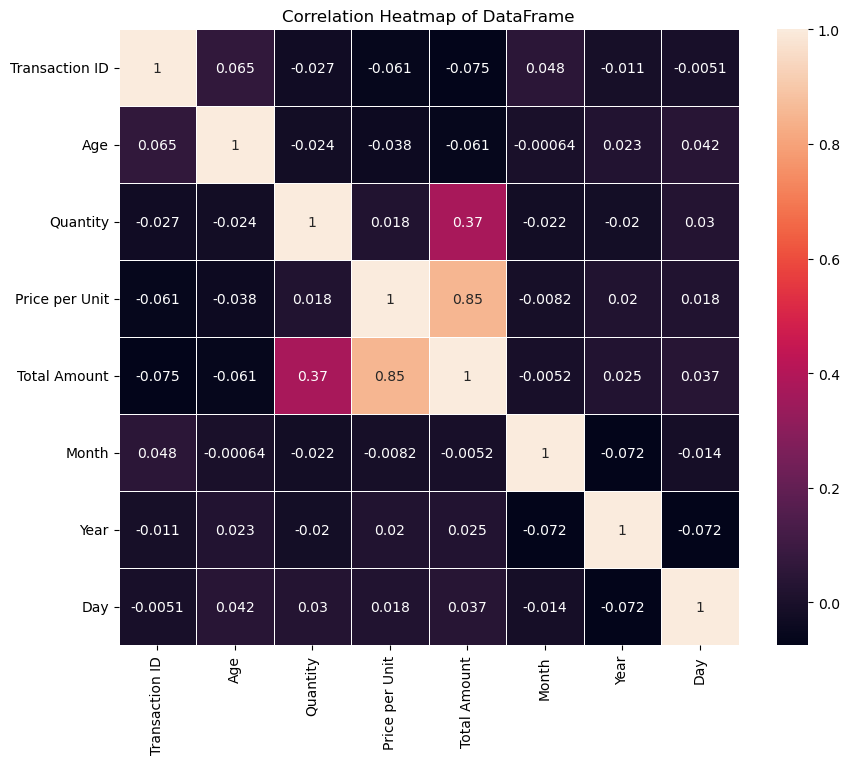

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=0.5)

plt.title("Correlation Heatmap of DataFrame")
plt.show()

- The heatmap shows that Price per Unit has the strongest impact on Total Sales.
- Quantity also affects total sales, but less than price.
- Age, Month, and Day show very weak correlation with sales value.

#### Business Recommendations 

- Focus marketing efforts on Electronics and Clothing categories.
- Target customers aged 25–50 years with personalized offers.
- Introduce bundle offers to increase quantity purchased.
- Plan promotions during high-performing months to maximize revenue.
- Since females contribute slightly more sales, design female-focused campaigns.